In [1]:
#Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
#zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
#ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
#Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
#Полученные значения должны быть равны.
#Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,а затем с использованием функций из библиотек numpy и pandas.

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

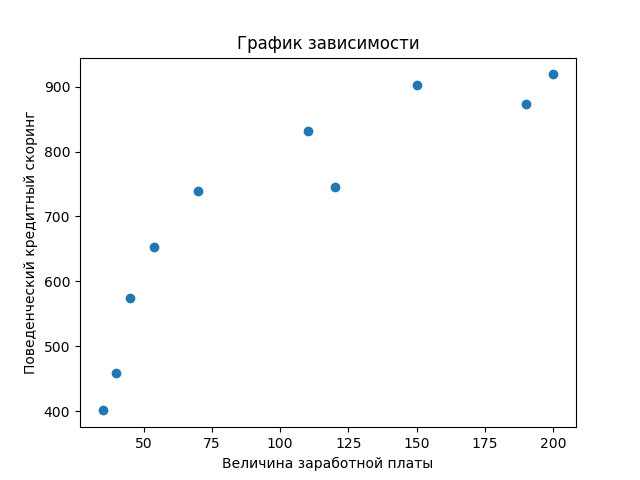

<Figure size 640x480 with 0 Axes>

In [4]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.title('График зависимости')
plt.show()

In [5]:
#Сильная линейная зависимость
#Между данными существует выраженная положительная корреляция

In [6]:
#Коэффициент ковариации:
def covar(zp, ks):
    MXY=sum(zp*ks)/len(zp)
    MX=sum(zp)/len(zp)
    MY=sum(ks)/len(ks)
    return MXY-MX*MY
print(f'Коэффициент ковариации: {covar(zp,ks): .3f}')

Коэффициент ковариации:  9157.840


In [7]:
#Функция cov библиотеки numpy:

cov=np.mean(zp*ks)-np.mean(ks)*np.mean(zp)

cov
9157.84

np.cov(zp,ks)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [8]:
#Несмещенная ковариаця
np.cov(zp,ks, ddof = 1)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [9]:
np.std(zp, ddof=1), np.std(ks, ddof=1)

(62.31318747531162, 183.99544076477068)

In [10]:
cov_nk=10175.37777778/(183.99544076477068*62.31318747531162)
print(f'Коэффициент несмещенной ковариации: {cov_nk: .3f}')

Коэффициент несмещенной ковариации:  0.887


In [11]:
#Смещенная ковариаця
np.cov(zp,ks, ddof = 0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [12]:
np.std(zp, ddof=0), np.std(ks, ddof=0)

(59.115480206118605, 174.55340157098058)

In [13]:
cov_sk=9157.84/(174.55340157098058*59.115480206118605)
print(f'Коэффициент смещенной ковариации: {cov_sk: .3f}')

Коэффициент смещенной ковариации:  0.887


In [14]:
#Коэффициент корреляции Пирсона
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [15]:
#Функция corr библиотеки pandas:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [16]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


In [17]:
#Вывод: Как было видно из графика, существует сильная линейная взаимосвязь между исходными данными.

In [18]:
#Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
#131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
#Известно, что в генеральной совокупности IQ распределен нормально.
#Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [19]:
IQ=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
print(f'Среднее выборочное: {np.mean(IQ): .2f}\n'
      f'Размер выборки n={len(IQ)}\n'
      f'Среднее квадратическое отклонение по выборке(несмещенное): {np.std(IQ, ddof=1): .2f}'
     )

Среднее выборочное:  118.10
Размер выборки n=10
Среднее квадратическое отклонение по выборке(несмещенное):  10.55


In [20]:
def t_from_table(confidens, len_array):
    alpha=(1-confidens)
    return stats.t.ppf(1-alpha/2, len_array-1)
print(f'Табличное значение t-критерия для 95%-го доверительного интервала данной выборки: {t_from_table(0.95, len(IQ)): .3f}')

Табличное значение t-критерия для 95%-го доверительного интервала данной выборки:  2.262


In [21]:
def confidens_int(arr, confidens):
    return round(np.mean(IQ)-t_from_table(confidens,len(IQ))*np.std(IQ, ddof=1)/len(IQ)**0.5,3), \
           round(np.mean(IQ)+t_from_table(confidens,len(IQ))*np.std(IQ, ddof=1)/len(IQ)**0.5,3)

print(f'95%-й доверительный интервал для истинного значения IQ: {confidens_int(IQ, 0.95)}')

95%-й доверительный интервал для истинного значения IQ: (110.556, 125.644)


In [22]:
#Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. 
#Объем выборки равен 27, среднее выборочное составляет 174.2. 
#Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [23]:
left=174.2-(1.96*25**0.5)/27**0.5
right=174.2+(1.96*25**0.5)/27**0.5
print(f'95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности: [{left: .3f};{right: .3f}]')

95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности: [ 172.314; 176.086]
